## Análise dados de óbito por Dengue em todo o Brasil

O conjunto de dados, contém os casos notificados de dengue que evoluíram para óbito. O cálculo de acordo com o `Ministério da Saúde` (MS), foi realizado utilizando números absolutos.

O dataset utilizado sofreu sua ultima atualização em 12 de Junho de 2018.

Conjunto de dados disponibilizados em: http://dados.gov.br/dataset/odm6_dengue

In [0]:
import pandas as pd
from plotnine import *

Carregando os dados

In [0]:
df_dengue = pd.read_csv('https://raw.githubusercontent.com/Zeldsc/analise_dengue/master/dados/obitos-dengue/odm6_denguenone.csv', sep = ',')

Exibindo os dados, limitando a 5 linhas.

In [6]:
# Exibindo os 5 primeiros itens do DataFrame.
df_dengue.head(5)

,indicx,no_cidade
0,0,Engenheiro Coelho
1,0,São José do Piauí
2,1,Jataí
3,0,Carolina
4,0,Abre Campo


O DataSet é composto por dois atributos, o `indicx`, que representa o índice de casos, e o `no_cidade`, que representa o nome da cidade.

In [7]:
# Visão geral (estatística) dos dados
df_dengue.describe()

,indicx
count,5570.000000
mean,0.085278
std,0.709135
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,25.000000


Ao utilizar o método `describe` é possivel perceber que, além da média baixa, a cidade com maior indice de casos, tem 25, enquanto o mais baixo possui 0.

## Cidade com maior índice de mortes causados por dengue

Com o método `query` é possivel verificar qual a cidade com o maior índice de mortes causados por dengue.

In [8]:
df_dengue.query('indicx == indicx.max()')

,indicx,no_cidade
4198,25,Fortaleza


Listar as 10 cidades com maior incidência de óbitos por dengue, ordenando-as por casos de incidencia.

In [9]:
# Ordenamos os valores, e inserimos o argumento ascending como False
# Logo, se a ordem crescente (ascending) é falsa, a ordenação será decrescente
df_dengue.sort_values('indicx', ascending=False).head(10)

,indicx,no_cidade
4198,25,Fortaleza
5343,24,Goiânia
3022,15,Brasília
3769,14,São Paulo
3046,10,Campinas
4657,9,Jaboatão dos Guararapes
319,8,Salvador
1285,8,Passos
1533,8,Jaú
2917,7,Recife


Agrupar os dados pelos valores dos indices para verificar quantos possíveis grupos são.

In [0]:
grupos_cidades_por_indice = df_dengue.groupby('indicx').agg('count')

Após o agrupamento com o método `groupby`, uma agregação é utiliza para fazer com que, a quantidade de cidades em cada grupo seja contada.

In [11]:
grupos_cidades_por_indice.head(4) # Exibe os 4 primeiros elementos

,no_cidade
indicx,
0,5332
1,167
2,31
3,16


`Classificar` cada cidade, as classes utilizadas serão os valores do índice do mesmo conjunto de dados, isto está sendo feito basicamente para que, cada grupo fique explicitamente registrado no DataFrame, e não somente através do indice.

In [0]:
grupos_cidades_por_indice.insert(0, 'classe', grupos_cidades_por_indice.index)

In [13]:
grupos_cidades_por_indice.head(5)

,classe,no_cidade
indicx,,
0,0,5332
1,1,167
2,2,31
3,3,16
4,4,5


Ao olhar o DataFrame acima, percebe-se que, o indice tem o mesmo valor que o atributo que foi nomeado de classe, porém a diferença é que, estes valores estarão disponíveis dentro do DataFrame.

No plot a classe de valores zero será excluído por conter muitos valores e dificultar a visualização de grupos que possuem poucas cidades.

In [0]:
# Removendo as classes zero
grupos_cidades_por_indice_sem_zero = grupos_cidades_por_indice[grupos_cidades_por_indice['classe'] != 0]

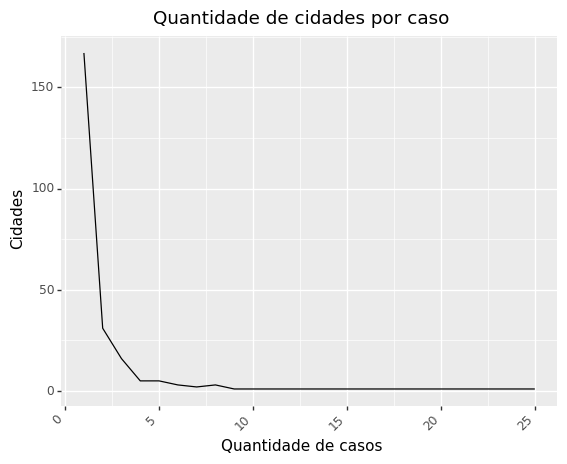

<ggplot: (-9223363272654496326)>

In [15]:
(ggplot(grupos_cidades_por_indice_sem_zero, aes(x = 'classe', y = 'no_cidade')) +
 geom_line()  + 
 labs(title = 'Quantidade de cidades por caso',
       y = 'Cidades',
       x = 'Quantidade de casos') + 
  theme(axis_text_x = element_text(angle = 45, hjust = 1)))

## Índice médio de casos de dengue

Primeiramente remover as cidades que tiveram indice zero de ocorrencia, para evitar interferencias na obtenção de estatisticas.

In [0]:
cidades_com_algum_caso = df_dengue.query('indicx >= 1')

Verificar quantos valores tinham e quantos ficaram após este filtro.

In [17]:
num_cidades_com_caso = len(cidades_com_algum_caso)
num_gerais = len(df_dengue)

print('{} - cidades com algum caso de dengue'.format(num_cidades_com_caso))
print('{} - Número geral de cidades no conjunto de dados'.format(num_gerais))

238 - cidades com algum caso de dengue
5570 - Número geral de cidades no conjunto de dados


Obter a média dos índices.

In [18]:
cidades_com_algum_caso['indicx'].mean()

1.995798319327731

Cidades que possuem casos maiores ou iguais a média.

In [0]:
cidades_medias = cidades_com_algum_caso.query('indicx >= indicx.mean()')

In [20]:
cidades_com_algum_caso['indicx'].mean()

1.995798319327731

Analise das cidades com valores iguais ou acima da média. Lembrando que, esta é a média dos valores entre as cidades que possuem algum caso de óbito.

In [21]:
cidades_medias.head(5)

,indicx,no_cidade
44,3,Belo Horizonte
158,6,Divinópolis
319,8,Salvador
390,2,São Vicente
608,3,Maracanaú


Criação de variaveis contendo as capitais, para verificar quais contem registros de ocorrencia

In [0]:
capitais = ["São Paulo", "Rio de Janeiro", "Belo Horizonte", "Porto Alegre", "Curitiba", "Florianópolis",
                "Goiânia", "Salvador", "Brasília", "Fortaleza", "Recife", "Manaus", "Vitória",
                "Belém", "Natal", "Cuiabá", "São Luís", "João Pessoa", "Campo Grande", "Maceió", "Aracaju",
                "Teresina", "Palmas", "Boa Vista", "Porto Velho", "Rio Branco"]

In [0]:
capitais_com_casos = cidades_medias[cidades_medias['no_cidade'].isin(capitais)]

In [24]:
capitais_com_casos.head(5)

,indicx,no_cidade
44,3,Belo Horizonte
319,8,Salvador
803,7,Natal
2310,2,Vitória
2917,7,Recife


Através do plot é possível verificar o número de casos em cada capital identificada com casos de dengue.

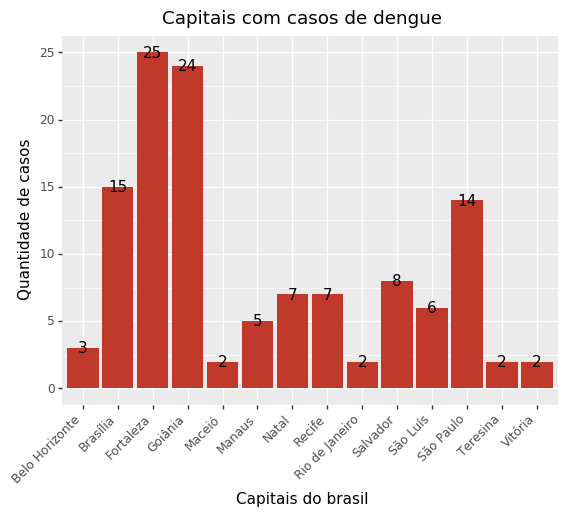

<ggplot: (-9223363272655903905)>

In [25]:
(ggplot(capitais_com_casos, aes(x='no_cidade', y='indicx')) +
  geom_col(fill = "#c0392b") +
  geom_text(aes(label = 'indicx')) +
  labs(title = 'Capitais com casos de dengue',
       y = 'Quantidade de casos',
       x = 'Capitais do brasil') +
  theme(axis_text_x = element_text(angle = 45, hjust = 1)))

Após analise, verificou-se que Campo Grande e Goiânia tem os maiores indices de óbitos por dengue, ambas capitais pertencem a região do centro-oeste, dado que é corroborado pela seguinte noticia:
https://g1.globo.com/bemestar/noticia/brasil-tem-62-mortes-por-dengue-em-2018.ghtml